In [1]:
from IPython.core.display import HTML, Markdown, display

import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import ipywidgets as widgets

import os

<img src="./images/shepard_stims.png" width="400">

# Lab 1: Mental Rotation

As described in the reading, in the Shepard & Metzler (1971) experiments, the time it took people to decide if an object was the same (just rotated) or different (a mirror reflection) depended on the angle of rotation: 

<img src="./images/shepardresult.png" width="300">

In other words, it would take you longer to decide if the 30 degree rotated version of your cup was the same as the upright version relative to the 15 degree rotated version. The idea is that in order to make the same/mirror judgement, people actually mentally rotate the object. Bigger angles require more time to “rotate” in your mind just as they would in the real world (see Figure below). As mentioned in class, Cooper (1976) performed an even more interesting followup which provided even stronger evidence that people rotate objects when doing the matching task. Thus, most people agree that people do seem to perform some kind of mental rotation.

<div class="alert alert-info" role="alert">
  <strong>Question 1</strong> <br>
    Picking up from last time, read in all the files from the lab session and combine them into one larger pandas data frame using the `pd.concat()` command.  Or you can simply read the combined file that you saved at the end of the last lab session.
</div>

In [2]:
# this is an example list comprehension which reads in the all the files.
# the f.startswith() part just gets rid of any junk files in that folder
filenames = [
    'mentalrot-data/' + f for f in os.listdir('mentalrot-data')
    if not f.startswith('.')
]
filenames

['mentalrot-data/todd_MentalRotationFinal_2019-10-16_09h19.14.626.csv',
 'mentalrot-data/db12_MentalRotationFinal_2019-10-16_10h07.25.323.csv',
 'mentalrot-data/MC24_MentalRotationFinal_2019-10-16_10h07.00.765.csv',
 'mentalrot-data/iw44_MentalRotationFinal_2019-10-16_10h13.25.202.csv',
 'mentalrot-data/SK36_MentalRotationFinal_2019-10-16_10h06.46.723.csv',
 'mentalrot-data/nd24_MentalRotationFinal_2019-10-16_10h07.00.120.csv',
 'mentalrot-data/si13_MentalRotationFinal_2019-10-16_10h08.40.421.csv',
 'mentalrot-data/so30_MentalRotationFinal_2019-10-16_10h07.15.941.csv',
 'mentalrot-data/AB29_MentalRotationFinal_2019-10-16_10h06.57.151.csv',
 'mentalrot-data/bk90_MentalRotationFinal_2019-10-16_10h06.50.402.csv',
 'mentalrot-data/j98_MentalRotationFinal_2019-10-16_10h06.41.102.csv',
 'mentalrot-data/kc10_MentalRotationFinal_2019-10-16_10h07.21.070.csv',
 'mentalrot-data/ml98_MentalRotationFinal_2019-10-16_10h06.48.933.csv',
 'mentalrot-data/vt15_MentalRotationFinal_2019-10-16_10h06.53.044

In [3]:
df = pd.concat([pd.read_csv(f) for f in filenames])
df.head()

,trialResp.keys,trialResp.corr,trialResp.rt,loop.thisRepN,loop.thisTrialN,loop.thisN,loop.thisIndex,loop.ran,loop.order,imagefile,corrAns,angle,participant,session,date,expName,psychopyVersion,frameRate
0,s,1,4.127,1,0,100,6,1,99,i3_100.jpg,s,100,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
1,d,1,2.501,1,0,100,71,1,99,i33_100_R.jpg,d,100,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
2,s,1,11.069,1,0,100,66,1,99,i30_150.jpg,s,150,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
3,s,1,2.434,1,0,100,47,1,99,i22_50.jpg,s,50,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
4,d,1,7.953,1,0,100,16,1,99,i8_50_R.jpg,d,50,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60


<div class="alert alert-info" role="alert">
  <strong>Question 2</strong> <br>
   The data from our experiment is conceptually a replication of <a href="https://openpsychologydata.metajnl.com/articles/10.5334/jopd.ai/">this paper</a> using the same stimuli.  Jump to the methods section of this paper and determine what quality control measures they applied to their data.  For instance what kind of trials were analyzed and which were excluded.  Where there any basis for excluding an entire participant?  In a markdown cell describe the set of exclusion criterion that the authors used.  Next, create a new data frame of the data from our experiment applying the same exclusion criterion. 
</div>

They remove the trials for each participant if they were not within plus or minus two standard deviations of the mean, calculated for each level of rotation and trial type separately.

### Method 1

In [4]:
qdfs = []

for c in ['s', 'd']:
    # Stimulus type
    for ang in [100, 150, 50, 0]:
        # Rotation
        d = df[(df.corrAns == c) & (df.angle == ang)]
        mean = d['trialResp.rt'].mean()
        std = d['trialResp.rt'].std()
        if mean and std:
            qdfs.append(d[abs(d['trialResp.rt'] - mean) < 2 * std])

qdf = pd.concat(qdfs)
qdf

,trialResp.keys,trialResp.corr,trialResp.rt,loop.thisRepN,loop.thisTrialN,loop.thisN,loop.thisIndex,loop.ran,loop.order,imagefile,corrAns,angle,participant,session,date,expName,psychopyVersion,frameRate
0,s,1,4.127,1,0,100,6,1,99,i3_100.jpg,s,100,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
5,s,1,2.983,1,0,100,26,1,99,i12_100.jpg,s,100,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
8,d,0,0.166,1,0,100,97,1,99,i46_100.jpg,s,100,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
12,d,0,0.064,1,0,100,2,1,99,i1_100.jpg,s,100,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
22,d,0,0.066,1,0,100,11,1,99,i5_100.jpg,s,100,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,d,1,5.189,1,0,100,14,1,99,i7_50_R.jpg,d,50,JL29,1,2019-10-16_10h06.52.100,MentalRotationFinal,3.1.2,60
57,d,1,9.492,1,0,100,30,1,99,i14_50_R.jpg,d,50,JL29,1,2019-10-16_10h06.52.100,MentalRotationFinal,3.1.2,60
86,d,1,7.724,1,0,100,12,1,99,i6_50_R.jpg,d,50,JL29,1,2019-10-16_10h06.52.100,MentalRotationFinal,3.1.2,60
88,d,1,4.091,1,0,100,3,1,99,i2_50_R.jpg,d,50,JL29,1,2019-10-16_10h06.52.100,MentalRotationFinal,3.1.2,60


### Method 2

In [5]:
qdf = df[df.groupby([
    'angle', 'corrAns', 'participant'
])['trialResp.rt'].transform(lambda x: x.between(x.mean() - x.std() * 2,
                                                 x.mean() + x.std() * 2))]
qdf

,trialResp.keys,trialResp.corr,trialResp.rt,loop.thisRepN,loop.thisTrialN,loop.thisN,loop.thisIndex,loop.ran,loop.order,imagefile,corrAns,angle,participant,session,date,expName,psychopyVersion,frameRate
5,s,1,2.983,1,0,100,26,1,99,i12_100.jpg,s,100,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
6,d,1,3.718,1,0,100,1,1,99,i1_50_R.jpg,d,50,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
7,s,0,0.383,1,0,100,76,1,99,i35_100_R.jpg,d,100,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
8,d,0,0.166,1,0,100,97,1,99,i46_100.jpg,s,100,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
9,s,0,0.116,1,0,100,42,1,99,i19_150_R.jpg,d,150,todd,1,2019-10-16_09h19.14.626,MentalRotationFinal,3.1.2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,s,1,6.172,1,0,100,81,1,99,i37_150.jpg,s,150,JL29,1,2019-10-16_10h06.52.100,MentalRotationFinal,3.1.2,60
96,d,1,4.055,1,0,100,25,1,99,i12_50_R.jpg,d,50,JL29,1,2019-10-16_10h06.52.100,MentalRotationFinal,3.1.2,60
97,d,1,6.189,1,0,100,50,1,99,i23_150_R.jpg,d,150,JL29,1,2019-10-16_10h06.52.100,MentalRotationFinal,3.1.2,60
98,d,1,4.506,1,0,100,73,1,99,i34_100_R.jpg,d,100,JL29,1,2019-10-16_10h06.52.100,MentalRotationFinal,3.1.2,60


<div class="alert alert-info" role="alert">
  <strong>Question 3</strong> <br>
    Use the pandas 'groupby' function to compute the average reaction time as a function of the angle of the stimulus.  It may help to go back to the <a href="http://gureckislab.org/courses/fall19/labincp/labs/dataframesplotting.html">notebook on dataframes</a> and plotting and searching for the groupby example.
</div>

In [6]:
qdf.groupby('angle')['trialResp.rt'].mean()

angle
0      1.700236
50     3.469550
100    4.649440
150    5.073354
Name: trialResp.rt, dtype: float64

<div class="alert alert-info" role="alert">
  <strong>Question 4</strong> <br>
    Use the pandas 'groupby' function to compute the average accuracy per participant.  Again, it may help to go back to the <a href="http://gureckislab.org/courses/fall19/labincp/labs/dataframesplotting.html">notebook on dataframes</a> and plotting and searching for the groupby example.
</div>

In [7]:
df.groupby('participant')['trialResp.corr'].mean()

participant
AB29    0.85
Cc01    0.89
JL29    0.98
MC24    0.79
SK36    0.97
bk90    0.77
db12    0.94
de24    0.90
ek87    0.88
iw44    0.93
j98     0.93
kc10    0.88
kd27    0.91
ml98    0.98
mm      0.96
nd24    0.90
pr27    0.99
si13    0.59
so30    0.76
todd    0.50
vt15    0.85
Name: trialResp.corr, dtype: float64

<div class="alert alert-info" role="alert">
  <strong>Question 5</strong> <br>
    Together question 3 and 4 allow you to essentially re-create Table 1 from the paper.  Recreate this table for our dataset using a pandas dataframe. Although this table has a heirarchical, two layer column label it is fine if you just label the columns using "Mean RT" and "Mean error", etc...
</div>

In [8]:
t = {}

t['Mean RT'] = (qdf.groupby('angle')['trialResp.rt'].mean() * 1e3).apply(int)
t['SE RT'] = (qdf.groupby('angle')['trialResp.rt'].sem() * 1e3).apply(int)
t['%E Errors'] = ((1 - qdf.groupby('angle')['trialResp.corr'].mean()) *
                  1e2).apply(round, args=(1, ))
t['SE Errors'] = (qdf.groupby('angle')['trialResp.corr'].sem() * 1e2).apply(
    round, args=(1, ))

pd.DataFrame(t)

,Mean RT,SE RT,%E Errors,SE Errors
angle,,,,
0,1700,73,1.5,0.9
50,3469,93,10.7,1.3
100,4649,121,13.5,1.4
150,5073,143,19.3,1.6


<div class="alert alert-info" role="alert">
  <strong>Question 6</strong> <br>
    Using the seaborn 'scatterplot()' function (<a href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot">docs</a>), create a plot of angle versus reaction time collapsing across all the subjects in the task.  You should restrict you analysis the same trials that were analyzed in the target reading.
</div>

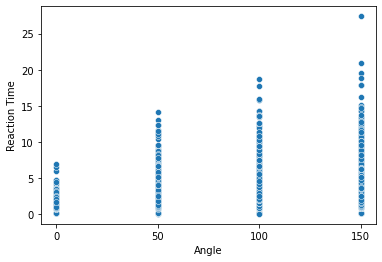

In [13]:
sns.scatterplot(data=qdf, x='angle', y='trialResp.rt')
plt.xticks([0, 50, 100, 150])
plt.ylabel('Reaction Time')
plt.xlabel('Angle')
plt.show()

<div class="alert alert-info" role="alert">
  <strong>Question 7</strong> <br>
    As you have seen the regplot() and scatterplot() types in seaborn are quite related.  Replot the data from above this time using regplot so you can get a sense of the best fit regression line fit to the overall dataset.  Again, you should restrict you analysis the same trials that were analyzed in the target reading.
</div>

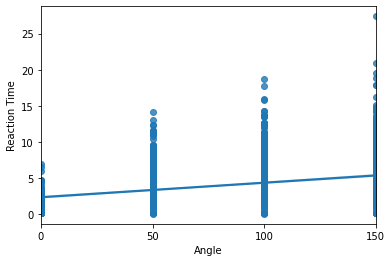

In [16]:
sns.regplot(data=qdf, x='angle', y='trialResp.rt')
plt.xticks([0, 50, 100, 150])
plt.ylabel('Reaction Time')
plt.xlabel('Angle')
plt.show()

<div class="alert alert-info" role="alert">
  <strong>Question 8</strong> <br>
    Using the statsmodels ordinary least squares regression peform a regression of angle (predictor) onto reaction time (outcome) for the entire class data.  Compare the cofficients you obtained to the ones reported in the results section of the paper.
</div>

In [17]:
df['rt'] = df['trialResp.rt']
smf.ols(formula='rt ~ angle', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     188.9
Date:                Wed, 05 May 2021   Prob (F-statistic):           3.17e-41
Time:                        10:45:57   Log-Likelihood:                -5515.6
No. Observations:                2100   AIC:                         1.104e+04
Df Residuals:                    2098   BIC:                         1.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5725      0.153     16.840      0.000       2.273       2.872
angle          0.0205      0.001     13.745      0.000       0.018       0.023
==============================================================================
Omnibus:                     1064.850   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10691.674
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                      13.170   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-info" role="alert">
  <strong>Question 9</strong> <br>
    Although in the previous step we might see evidence of the increase of reaction time with angle we averaged across a number of other relevant aspects of our data frame.  For instance we averaged across both the subjects (participants column) and the type of stimuli (if it was 'same' or 'different' - this is in the 'corrAns' column).  Using the example groupby command displayed in class, find the average reaction time as a function of angle and same/different for each individual subject.
</div>

In [31]:
ndf = qdf.groupby(['angle', 'corrAns', 'participant'])['trialResp.rt'].mean()
ndf = ndf.unstack().reset_index()
ndf = ndf.melt(id_vars=['angle', 'corrAns'], value_name='rt')

<div class="alert alert-info" role="alert">
  <strong>Question 10</strong> <br>
    Using the dataframe you constructed in the last step recreate Figure 3 from the paper.  Hint: the plot in Figure three is akin to the 'catplot' in seaborn.  Consult the seaborn documentation for information on this plot type.
</div>

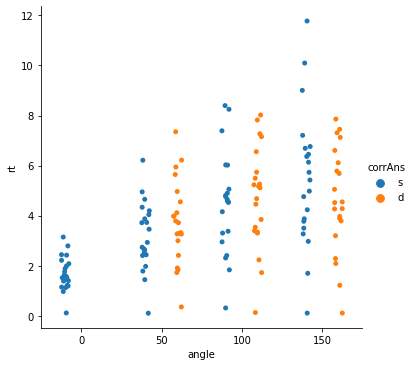

In [34]:
sns.catplot(data=ndf, x='angle', y='rt', hue='corrAns', dodge=True)

<div class="alert alert-info" role="alert">
  <strong>Question 11</strong> <br>
    The analyses we have considered so far combine across subjects.  However we would often like to analyze the effect in terms of individuals.  Does every individual show this pattern or only some?  Let's approach this two ways.  One, graphically by making a plot of every individual subject.  Two, analytically but running a separate regression model for each subject.  For the plot use the seaborn `regplot`.  Some code is provided to show and example of iterating with a for loop over individual subjects in the data frame.
</div>

This gives a list of all the unique subjects in our data frame

In [39]:
df.participant.unique()

21

This selects only the data from the second subject (db12)

In [36]:
subs = df.participant.unique()
print(len(subs))
part_df = df[df.participant == subs[1]]
part_df.head()

21


,trialResp.keys,trialResp.corr,trialResp.rt,loop.thisRepN,loop.thisTrialN,loop.thisN,loop.thisIndex,loop.ran,loop.order,imagefile,corrAns,angle,participant,session,date,expName,psychopyVersion,frameRate,rt
0,s,1,2.970,1,0,100,36,1,99,i17_50.jpg,s,50,db12,1,2019-10-16_10h07.25.323,MentalRotationFinal,3.1.2,60,2.970
1,s,1,5.654,1,0,100,11,1,99,i5_100.jpg,s,100,db12,1,2019-10-16_10h07.25.323,MentalRotationFinal,3.1.2,60,5.654
2,d,1,7.175,1,0,100,93,1,99,i43_100_R.jpg,d,100,db12,1,2019-10-16_10h07.25.323,MentalRotationFinal,3.1.2,60,7.175
3,s,1,2.922,1,0,100,77,1,99,i35_150.jpg,s,150,db12,1,2019-10-16_10h07.25.323,MentalRotationFinal,3.1.2,60,2.922
4,d,1,4.004,1,0,100,96,1,99,i45_100_R.jpg,d,100,db12,1,2019-10-16_10h07.25.323,MentalRotationFinal,3.1.2,60,4.004


This plot reaction time as a function of angle separately for the same and different trial for this one participant.

Participant 0 - todd


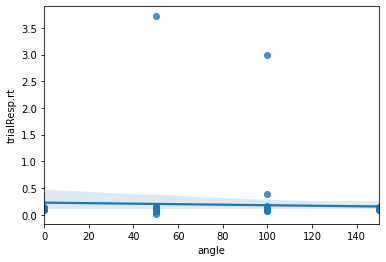

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2172
Date:                Wed, 05 May 2021   Prob (F-statistic):              0.642
Time:                        11:46:29   Log-Likelihood:                -62.272
No. Observations:                  92   AIC:                             128.5
Df Residuals:                      90   BIC:                             133.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2261      0.105      2.148      0.0

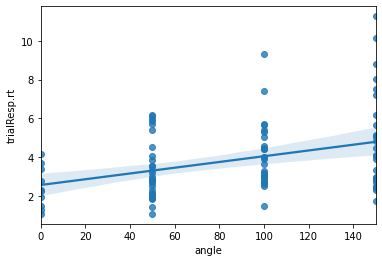

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     14.52
Date:                Wed, 05 May 2021   Prob (F-statistic):           0.000250
Time:                        11:46:29   Log-Likelihood:                -191.17
No. Observations:                  94   AIC:                             386.3
Df Residuals:                      92   BIC:                             391.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5527      0.399      6.405      0.0

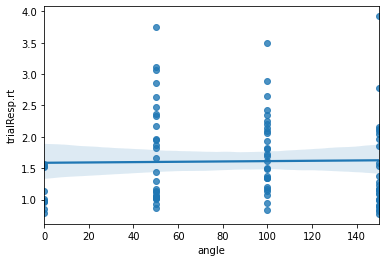

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                   0.03186
Date:                Wed, 05 May 2021   Prob (F-statistic):              0.859
Time:                        11:46:29   Log-Likelihood:                -100.61
No. Observations:                  94   AIC:                             205.2
Df Residuals:                      92   BIC:                             210.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5864      0.152     10.432      0.0

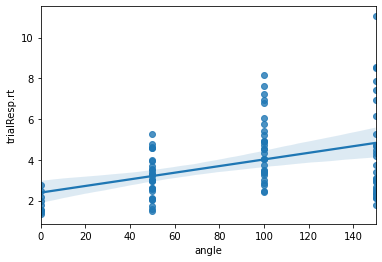

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     19.86
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.30e-05
Time:                        11:46:30   Log-Likelihood:                -187.43
No. Observations:                  96   AIC:                             378.9
Df Residuals:                      94   BIC:                             384.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3967      0.373      6.430      0.0

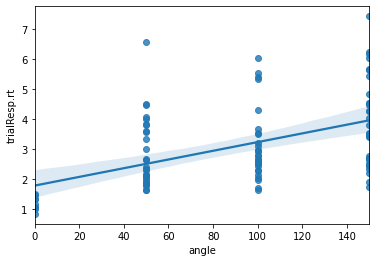

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     30.80
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.63e-07
Time:                        11:46:30   Log-Likelihood:                -157.15
No. Observations:                  96   AIC:                             318.3
Df Residuals:                      94   BIC:                             323.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7797      0.271      6.564      0.0

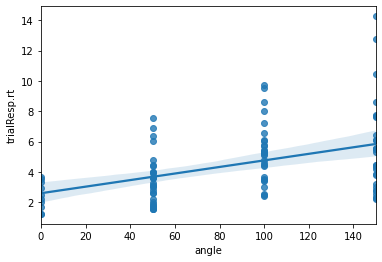

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     22.32
Date:                Wed, 05 May 2021   Prob (F-statistic):           8.17e-06
Time:                        11:46:30   Log-Likelihood:                -209.15
No. Observations:                  95   AIC:                             422.3
Df Residuals:                      93   BIC:                             427.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5990      0.470      5.525      0.0

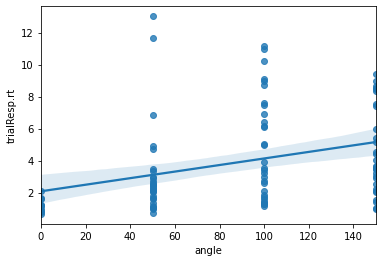

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     12.16
Date:                Wed, 05 May 2021   Prob (F-statistic):           0.000742
Time:                        11:46:31   Log-Likelihood:                -237.90
No. Observations:                  97   AIC:                             479.8
Df Residuals:                      95   BIC:                             485.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0844      0.604      3.451      0.0

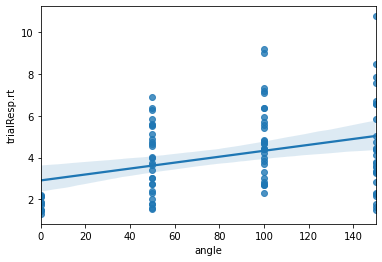

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     12.79
Date:                Wed, 05 May 2021   Prob (F-statistic):           0.000552
Time:                        11:46:31   Log-Likelihood:                -196.70
No. Observations:                  96   AIC:                             397.4
Df Residuals:                      94   BIC:                             402.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9094      0.404      7.198      0.0

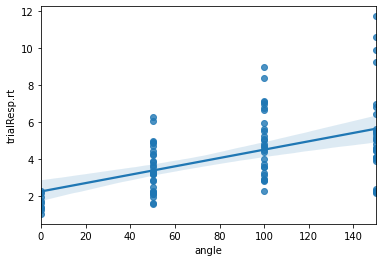

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     33.95
Date:                Wed, 05 May 2021   Prob (F-statistic):           8.08e-08
Time:                        11:46:31   Log-Likelihood:                -191.23
No. Observations:                  95   AIC:                             386.5
Df Residuals:                      93   BIC:                             391.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2339      0.396      5.638      0.0

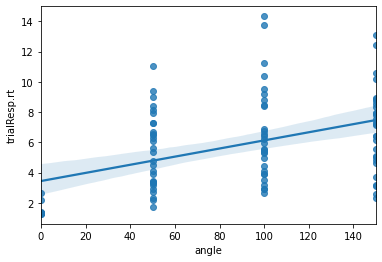

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     21.69
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.05e-05
Time:                        11:46:32   Log-Likelihood:                -232.08
No. Observations:                  96   AIC:                             468.2
Df Residuals:                      94   BIC:                             473.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4468      0.593      5.817      0.0

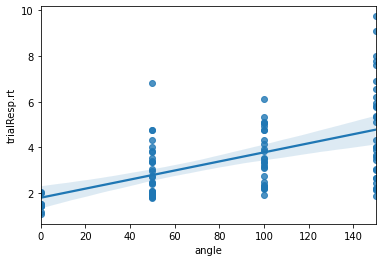

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     38.05
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.77e-08
Time:                        11:46:32   Log-Likelihood:                -174.77
No. Observations:                  95   AIC:                             353.5
Df Residuals:                      93   BIC:                             358.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7917      0.335      5.353      0.0

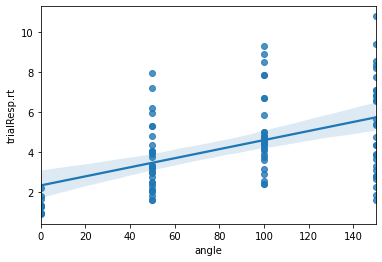

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     29.62
Date:                Wed, 05 May 2021   Prob (F-statistic):           4.16e-07
Time:                        11:46:32   Log-Likelihood:                -200.76
No. Observations:                  96   AIC:                             405.5
Df Residuals:                      94   BIC:                             410.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3371      0.428      5.466      0.0

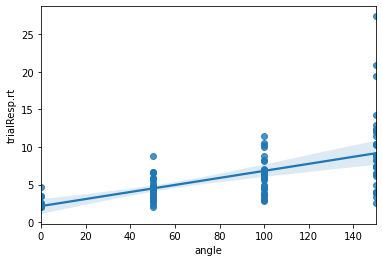

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     40.19
Date:                Wed, 05 May 2021   Prob (F-statistic):           8.43e-09
Time:                        11:46:33   Log-Likelihood:                -250.27
No. Observations:                  94   AIC:                             504.5
Df Residuals:                      92   BIC:                             509.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1444      0.763      2.809      0.0

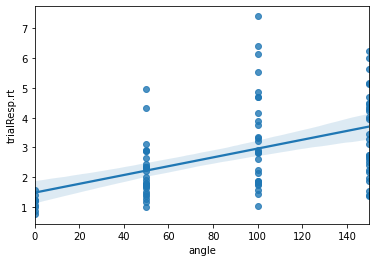

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     29.54
Date:                Wed, 05 May 2021   Prob (F-statistic):           4.39e-07
Time:                        11:46:33   Log-Likelihood:                -158.48
No. Observations:                  95   AIC:                             321.0
Df Residuals:                      93   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4829      0.280      5.291      0.0

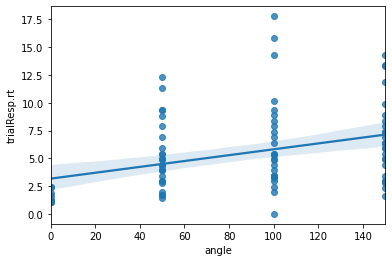

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     14.11
Date:                Wed, 05 May 2021   Prob (F-statistic):           0.000298
Time:                        11:46:33   Log-Likelihood:                -252.47
No. Observations:                  96   AIC:                             508.9
Df Residuals:                      94   BIC:                             514.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1771      0.722      4.403      0.0

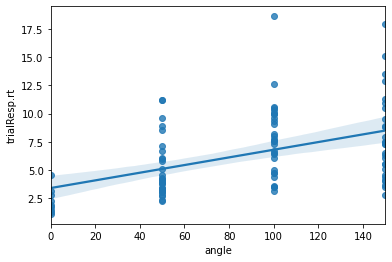

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     25.12
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.60e-06
Time:                        11:46:34   Log-Likelihood:                -241.62
No. Observations:                  94   AIC:                             487.2
Df Residuals:                      92   BIC:                             492.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3841      0.697      4.853      0.0

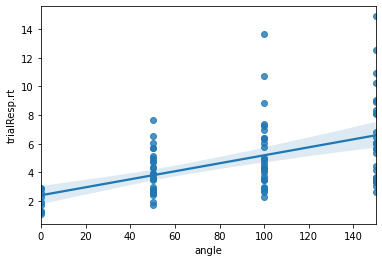

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     31.20
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.40e-07
Time:                        11:46:34   Log-Likelihood:                -210.31
No. Observations:                  93   AIC:                             424.6
Df Residuals:                      91   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4100      0.512      4.705      0.0

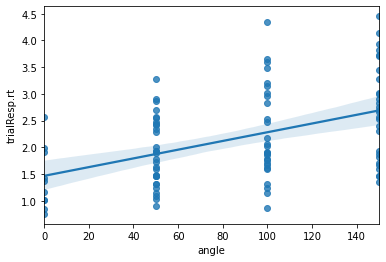

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     25.53
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.14e-06
Time:                        11:46:34   Log-Likelihood:                -111.21
No. Observations:                  96   AIC:                             226.4
Df Residuals:                      94   BIC:                             231.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4650      0.164      8.952      0.0

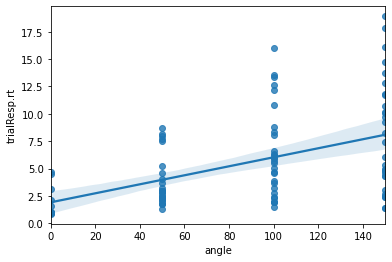

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     27.95
Date:                Wed, 05 May 2021   Prob (F-statistic):           7.94e-07
Time:                        11:46:35   Log-Likelihood:                -265.88
No. Observations:                  97   AIC:                             535.8
Df Residuals:                      95   BIC:                             540.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9138      0.805      2.378      0.0

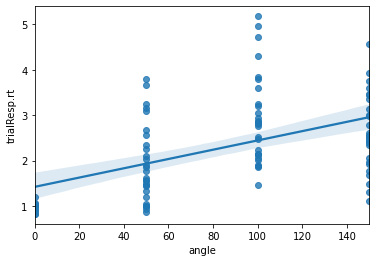

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     29.24
Date:                Wed, 05 May 2021   Prob (F-statistic):           4.92e-07
Time:                        11:46:35   Log-Likelihood:                -124.43
No. Observations:                  95   AIC:                             252.9
Df Residuals:                      93   BIC:                             258.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4230      0.193      7.369      0.0

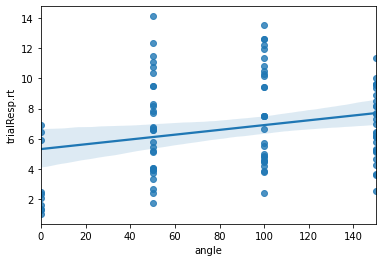

                            OLS Regression Results                            
Dep. Variable:      Q('trialResp.rt')   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     6.399
Date:                Wed, 05 May 2021   Prob (F-statistic):             0.0130
Time:                        11:46:36   Log-Likelihood:                -247.46
No. Observations:                  98   AIC:                             498.9
Df Residuals:                      96   BIC:                             504.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3202      0.640      8.310      0.0

In [65]:
for i, s in enumerate(subs):
    print(f'Participant {i} - {s}')
    part_df = qdf[qdf.participant == s]
    sns.regplot(data=part_df, x='angle', y='trialResp.rt')
    plt.show()
    print(
        smf.ols(formula="Q('trialResp.rt') ~ angle",
                data=part_df).fit().summary())
    print('----')
    print()

In [66]:
subjs = df.participant.unique()
print(subjs.shape)

(21,)


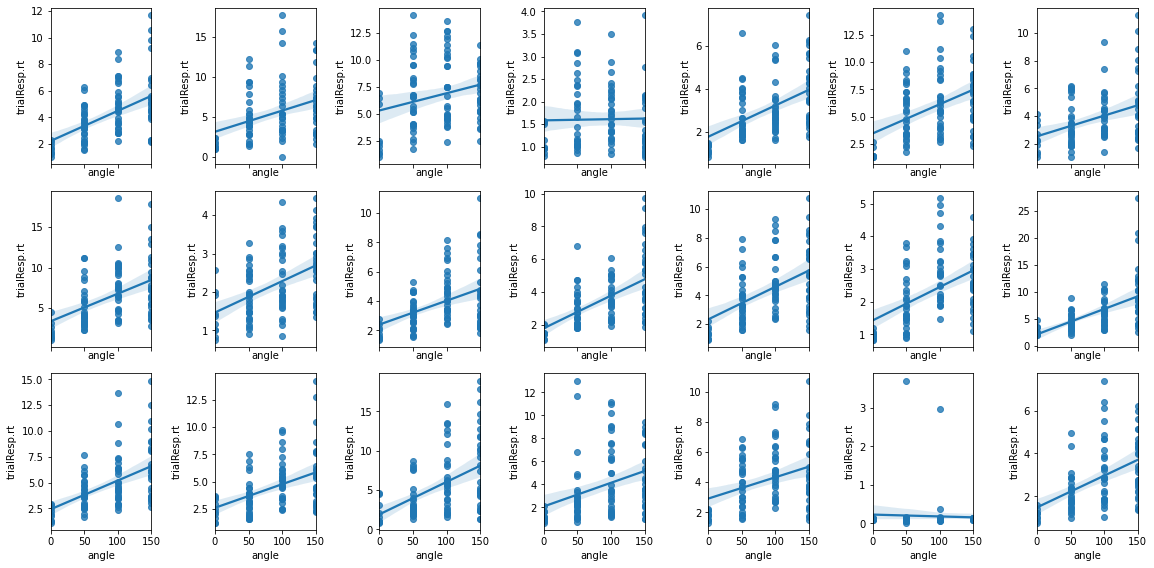

In [72]:
fig, ax = plt.subplots(3, 7, figsize=(16, 8), sharex=True)

ax = ax.ravel()

p = 0
for idx, part_df in qdf.groupby('participant'):
    sns.regplot(x='angle', y='trialResp.rt', data=part_df, ax=ax[p])
    p += 1

fig.tight_layout()

<div class="alert alert-info" role="alert">
  <strong>Question 12</strong> <br>
    In your own word summarize the results of the analyses you conducted above.  Specifically you should mention what the regresssion results imply about the data.  How consistent is the pattern across subjects?  Does the experiment we ran in class replicate the finding in the target paper?
</div>

All the participants except `todd`, `MC24`, and `si13` showed consistent increasing pattern as we saw for the group data. Except for that, we successfully replicate the result of the original paper.